# Principal Component Analysis (PCA) using Single Value Decomposition (SVD)

### Algorithm for Classical PCA:
1. Change the basis of the vectors so that they are brought close to origin. Mathematically, we use ***mean of give vectors*** for this purpose.

2. We find the covarinace matrix of the vectors. This is needed to understand the right fit of principal component line. ***The greater the varinace of the respective data points, it is understood that the line fits well.***

3. We find the Eigenvalue and hence Eigenvector. Eigen Values and Eigen Vectors give the projection of the data points on PCA scale. ***Eigen Vectors give the relationship between the principal component line and attributes in the dataset (eg., height, weight, gene).*** This propotions to attributes is called leading scores.

4. Component lines with higher leading scores are retained there by reducing data loss.


### Mathematical Prespective:
PCA is based on projecting data points on such vector which covers most of the data points and keep them as close as possible. They key here is how the vectors are chosen.

This makes PCA to be utlized when ***to understand the varinace of the principal components***. This is the key feature of PCA. Excluding the support of Kernel fuctions (KPCA), PCA is linear and cannot be used for dimesionality reduction of non-linear data.



In [1]:
import numpy as np

class PCA:

  '''Number of componentst the High Dimension Data has to be reduced to'''
  def __init__(self, n_components):
    self.n=n_components
    self.components=None

  '''Perform PCA on train data'''
  def fit(self, x):
    '''Get the mean of the vector space'''
    self.mean=np.mean(x, axis=0)
    x=x-self.mean

    '''Get the covariance matrix'''
    cov=np.cov(x.T)

    '''Get the Eigen values and vectors of the Covarinace Matrix:'''
    eigVec, eigVal = np.linalg.eig(cov)
    eigVec=eigVec.T

    '''Sort the Eigen Vectors:
    This is nessacry as we chose only those Principal Componets which have high varinace'''
    idxs=np.argsort(eigVal)[::-1]
    eigVal=eigVal[idxs]
    eigVec=eigVec[idxs]

    self.components=eigVec[:self.n]
    return eigVec

  def transform(self, x):
    x=x-self.mean
    return np.dot(x, (self.components).T)


In [2]:
X1 = np.random.normal(0, 1, 500)
X2 = np.random.normal(0, 1, 500)
X3 = np.random.normal(0, 1, 500)
X4 = np.random.normal(0, 1, 500)

# Combine the features into a single dataset
x = np.column_stack((X1, X2, X3, X4))

pca=PCA(2)
principal_components=pca.fit(x)
post_pca_x=pca.transform(x)

print(f"Shape of X (Data Points) is: ",x.shape )
print(f"Shape of X after PCA is: ",post_pca_x.shape)
print(f"This represents the principal components (Eigen Vectors): \n",principal_components)

Shape of X (Data Points) is:  (500, 4)
Shape of X after PCA is:  (500, 2)
This represents the principal components (Eigen Vectors): 
 [[1.15401204 0.93748873 1.0873306  0.88106685]
 [0.93748873 0.88106685 1.0873306  1.15401204]
 [1.15401204 0.93748873 0.88106685 1.0873306 ]
 [1.0873306  0.93748873 1.15401204 0.88106685]]


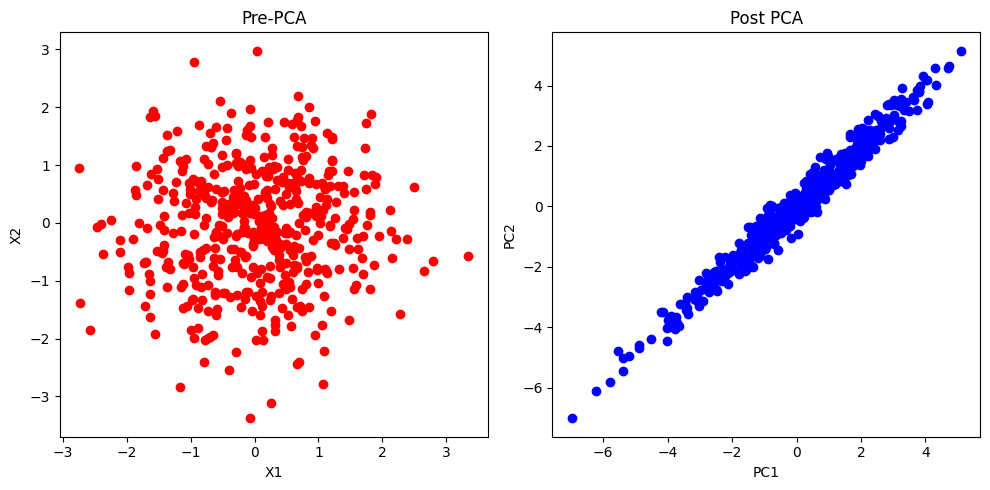

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].scatter(x[:,0], x[:,1], color='red')
axes[0].set_xlabel("X1")
axes[0].set_ylabel("X2")
axes[0].set_title('Pre-PCA')

axes[1].scatter(post_pca_x[:,0],post_pca_x[:,1], color='blue')
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")
axes[1].set_title('Post PCA')

plt.tight_layout()
plt.show()